## Машинное обучение: задача классификации

Задача классификации ставится, когда необходимо разделить объекты в датасете на два или более классов. Можно сказать, что в рассмотренной нами задаче регрессии целевая переменная - числовая, а в задаче классификации - категориальная.

Обычно отдельно выделяют **бинарную** или **двоичную классификацию**, и **многоклассовую** (которая является более общим случаем бинарной). Многоклассовая классификация может быть сведена к двоичной путём построения нескольких классификаторов one-vs-all.

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

В качестве примера задачи классификации рассмотрим предсказание вероятности гибели пассажира на титанике. Для начала загрузим датасет:

In [42]:
df = pd.read_csv("../../../data/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


Удалим из таблицы все неопределённые значения:

In [43]:
df.dropna(subset=['survived','pclass','age','sex','sibsp','parch'],inplace=True)

Важными свойствами, влияющими на вероятность выживания, являются:
* **pclass** - класс, которым плыл пассажир
* **sex** - пол
* **age** - возраст
* **sibsp** - siblings or spouses - количество родственников или супругов на борту
* **parch** - parents or children - количество родителей/детей на борту

Поскольку единственной категориальной переменной является пол, приведём его к числовому виду:

In [44]:
df['nsex'] = (df['sex'] == 'male').apply(int)

In [143]:
max_age = df['age'].max()
df['nage'] = df['age']/max_age

In [144]:
X = df[['nage','nsex','pclass']].to_numpy()
Y = df['survived'].to_numpy().astype(np.float64)
X

array([[0.3625    , 0.        , 1.        ],
       [0.01145875, 1.        , 1.        ],
       [0.025     , 0.        , 1.        ],
       ...,
       [0.33125   , 1.        , 3.        ],
       [0.3375    , 1.        , 3.        ],
       [0.3625    , 1.        , 3.        ]])

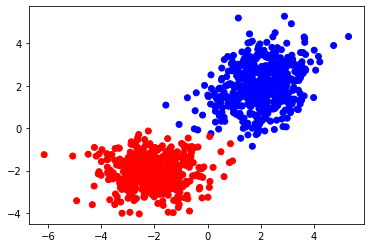

In [250]:
X,Y = sk.datasets.make_classification(
    n_samples=1000,n_features=2,
    n_informative=2,n_redundant=0,
    class_sep=2,n_clusters_per_class=1,flip_y=0)
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])

In [251]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

In [252]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def loss(W,b):
  return np.average(np.square(sigmoid(np.matmul(X,W)+b)-Y))

def loss(W, b):
    h = sigmoid(np.matmul(X,W)+b)
    return (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()

loss(W,b)

0.21971119857646118

In [253]:
def d(f,x,dx=0.1):
    n = x.shape[0]
    r = np.zeros_like(x)
    for i in range(n):
        dxc = np.eye(n)[i]*dx
        r[i] = (f(x+dxc)-f(x))/dx
    return r

d(lambda x: loss(x,b),W)

array([0.41206199, 0.31148889])

In [268]:
eta = 0.1
n = len(X)
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))
for i in range(100):
    print(f"({W} {b}) -> loss={loss(W,b)}")
    #print(f"dldw={dldw}, dldb={dldb}, W={W}, b={b}")

    dldw = d(lambda x: loss(x,b),W)
    dldb = d(lambda x: loss(W,x),b)
    h = sigmoid(np.matmul(X,W)+b)
    #dldw = np.matmul(X.T,h-Y.T)/n
    #dldb = (h-Y.T).mean()
    W-=eta*dldw
    b-=eta*dldb


([ 0.22071367 -0.20957576] [0.47759955]) -> loss=0.7385143966879545
([ 0.10990282 -0.31416116] [0.46503694]) -> loss=0.5420443297862665
([ 0.02218171 -0.3959123 ] [0.4530632]) -> loss=0.42072666467171327
([-0.04826633 -0.46090658] [0.44219509]) -> loss=0.3426464605126974
([-0.10631249 -0.51405122] [0.43242643]) -> loss=0.2894766988984593
([-0.15536249 -0.55870288] [0.42360599]) -> loss=0.25133479083664084
([-0.19770938 -0.59708712] [0.41557411]) -> loss=0.22276535187586355
([-0.23491568 -0.63070282] [0.40819574]) -> loss=0.20060544863288243
([-0.2680747  -0.66058897] [0.40136301]) -> loss=0.1829244836131528
([-0.29797375 -0.687488  ] [0.39499082]) -> loss=0.16848763910960993
([-0.32519531 -0.71194559] [0.38901177]) -> loss=0.15647231046851628
([-0.35018086 -0.73437299] [0.38337197]) -> loss=0.14631098310675691
([-0.37327222 -0.75508702] [0.37802785]) -> loss=0.13760017669634392
([-0.39473902 -0.77433655] [0.37294377]) -> loss=0.13004549106413946
([-0.41479749 -0.79232034] [0.36809025])

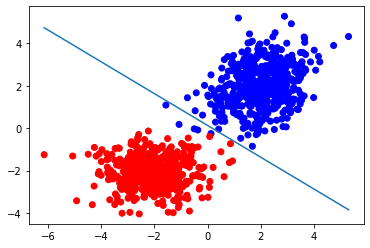

In [269]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
#x[0]x+x[1]y+b = 0
#y=-b/x[1]-x[0]/x[1]x
xs = X[:,0].min(), X[:,0].max()
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.show()